# Agricultural Data Analysis & Visualization (Karnataka)

This project performs **Exploratory Data Analysis (EDA)** on agricultural data from **Karnataka, India**.

The notebook explores how different crops, seasons, cultivated area, and production levels are related.  
By using data analysis and visualization techniques, we aim to discover patterns and trends in agricultural production.


## Project Objectives

The main goals of this analysis are:

- To understand the structure and content of the agricultural dataset
- To analyze crop production across different seasons
- To explore relationships between cultivated area and production
- To visualize important patterns using simple graphs
- To summarize insights in an easy-to-understand way


## Importing Required Libraries

In this section, we import the Python libraries needed for data analysis and visualization.

- **Pandas** is used for loading and manipulating datasets
- **Matplotlib** and **Seaborn** are used for creating visualizations


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('karnataka.csv')

In [52]:
df = pd.DataFrame(data)

In [53]:
df.head(10)

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
5,2004,Mangalore,51179,2996.6,27,Alluvial,Drip,107809,54.0,Coconut,44235.0,Kharif
6,2004,Mangalore,468,3522.8,27.2,Alluvial,Drip,1132,58.0,Coconut,203317.0,Kharif
7,2004,Mangalore,11841,3522.8,27.2,Alluvial,Drip,23960,58.0,Coconut,2134.0,Kharif
8,2004,Mangalore,50975,3522.8,27.2,Alluvial,Drip,126487,59.0,Coconut,45186.0,Kharif
9,2004,Mangalore,206,3729.8,27,Alluvial,Drip,804,50.0,Coconut,238542.0,Kharif


## Understanding the Data

Before analyzing the data, we need to understand its structure and contents:

- How many rows and columns are there?
- What are the column names?
- What types of data does each column have?
- Are there any missing values?

These checks help us clean the data and avoid errors in analysis.


In [54]:
print(df.shape)

(3158, 12)


In [55]:
df.describe()

,Year,Humidity,price
count,3158.000000,3156.000000,3157.000000
mean,2009.929702,55.581274,86532.987646
std,5.100895,2.470190,94892.570873
min,2004.000000,50.000000,637.000000
25%,2004.000000,54.000000,2644.000000
50%,2010.000000,56.000000,45186.000000
75%,2015.000000,57.000000,203317.000000
max,2019.000000,60.000000,765551.000000


In [56]:
# Transpose rows and columns of the description of data for a better review  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3158.0,2009.929702,5.100895,2004.0,2004.0,2010.0,2015.0,2019.0
Humidity,3156.0,55.581274,2.470190,50.0,54.0,56.0,57.0,60.0
price,3157.0,86532.987646,94892.570873,637.0,2644.0,45186.0,203317.0,765551.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3155 non-null   object 
 3   Rainfall     3157 non-null   object 
 4   Temperature  3157 non-null   object 
 5   Soil type    3100 non-null   object 
 6   Irrigation   3156 non-null   object 
 7   yeilds       3158 non-null   object 
 8   Humidity     3156 non-null   float64
 9   Crops        3156 non-null   object 
 10  price        3157 non-null   float64
 11  Season       3157 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 296.2+ KB


In [58]:
df.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif


In [59]:
df.head(10)

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
5,2004,Mangalore,51179,2996.6,27,Alluvial,Drip,107809,54.0,Coconut,44235.0,Kharif
6,2004,Mangalore,468,3522.8,27.2,Alluvial,Drip,1132,58.0,Coconut,203317.0,Kharif
7,2004,Mangalore,11841,3522.8,27.2,Alluvial,Drip,23960,58.0,Coconut,2134.0,Kharif
8,2004,Mangalore,50975,3522.8,27.2,Alluvial,Drip,126487,59.0,Coconut,45186.0,Kharif
9,2004,Mangalore,206,3729.8,27,Alluvial,Drip,804,50.0,Coconut,238542.0,Kharif


In [60]:
# There is a misspelled column (yeilds ---> yields) so I try to correct it:

df.rename(columns={'yeilds': 'yields'}, inplace = True)


In [61]:
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi


## Data Cleaning

Cleaning the data ensures that our analysis is accurate. Typical cleaning steps include:

- Removing or filling missing values
- Correcting data types if necessary
- Removing duplicates if any


In [62]:
# Finding Missing Values:

df.isnull().sum()

Year            0
Location        0
Area            3
Rainfall        1
Temperature     1
Soil type      58
Irrigation      2
yields          0
Humidity        2
Crops           2
price           1
Season          1
dtype: int64

In [63]:
# Missing Value percentage in each column:

df.isnull().mean() *100

Year           0.000000
Location       0.000000
Area           0.094997
Rainfall       0.031666
Temperature    0.031666
Soil type      1.836605
Irrigation     0.063331
yields         0.000000
Humidity       0.063331
Crops          0.063331
price          0.031666
Season         0.031666
dtype: float64

In [64]:
# columns with NaN:

df[df.columns[df.isnull(). any()]].isnull().sum()

Area            3
Rainfall        1
Temperature     1
Soil type      58
Irrigation      2
Humidity        2
Crops           2
price           1
Season          1
dtype: int64

In [65]:
# find the rows in "Area" column that has a missing value:

df[df['Area'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
284,2016,Hassan,NaN,3105,27.2,Sandy,Drip,4247,59.0,Cashew,761.0,Kharif
285,2017,Hassan,NaN,3105,27.2,Sandy,Drip,3290,50.0,Cashew,45608.0,Kharif
286,2018,Hassan,NaN,3105,27.2,Sandy,Drip,3138,54.0,Cashew,234581.0,Kharif


In [66]:
# find the rows in "Rainfall" column that has a missing value:

df[df['Rainfall'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
992,2005,Chikmangaluru,2688,NaN,40,Arid and Desert,Drip,283,59.0,Coconut,64409.0,Rabi


In [67]:
# find the rows in "Temperature" column that has a missing value:

df[df['Temperature'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
521,2011,Gulbarga,10,3522.8,NaN,Arid and Desert,Basin,2089,58.5,Ginger,234581.0,NaN


In [68]:
# find the rows in "Soil type" column that has a missing value:

df[df['Soil type'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
3100,2009,Bangalore,1468,3360,178,NaN,Spray,4015,52.5,Paddy,45186.0,Zaid
3101,2010,Bangalore,568,3360,179,NaN,Spray,4279,56.0,Paddy,238542.0,Zaid
3102,2011,Bangalore,407,3605.4,180,NaN,Spray,4167,57.0,Paddy,1516.0,Zaid
3103,2012,Bangalore,177,3605.4,181,NaN,Spray,4479,57.5,Paddy,200000.0,Zaid
3104,2013,Bangalore,51,3605.4,182,NaN,Spray,3699,57.0,Groundnut,4847.0,Zaid
3105,2014,Bangalore,173,3512.4,183,NaN,Spray,4904,55.0,Groundnut,51239.0,Zaid
3106,2015,Bangalore,201,3512.4,184,NaN,Spray,2821,56.0,Groundnut,216396.0,Zaid
3107,2016,Bangalore,206,3512.4,185,NaN,Spray,3472,54.0,Groundnut,2644.0,Zaid
3108,2017,Bangalore,243,3296,186,NaN,Spray,3647,58.0,Groundnut,44235.0,Zaid
3109,2016,Bangalore,123,3296,187,NaN,Spray,393,58.0,Groundnut,203317.0,Zaid


In [69]:
# find the rows in "Irrigation" column that has a missing value:

df[df['Irrigation'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
59,2004,Raichur,32,3360,27.2,Red,NaN,114,56.0,Coconut,57259.0,Rabi
60,2004,Raichur,1,3360,27.2,Red,NaN,3,57.0,Coconut,234779.0,Rabi


In [70]:
# find the rows in "Humidity" column that has a missing value:

df[df['Humidity'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
998,2011,Chikmangaluru,2035,233,42,Arid and Desert,Basin,8954,NaN,Coconut,45608.0,Rabi
1867,2006,Mangalore,10,3296,27,Heavy cotton,Drip,3290,NaN,Cashew,234779.0,Kharif


In [71]:
# find the rows in "Crops" column that has a missing value:

df[df['Crops'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
86,2004,Gulbarga,15009,236,43,Black,Basin,73730,53.0,NaN,646.0,Zaid
114,2004,Gulbarga,2034,3550,38,Loam,Spray,3899,59.5,NaN,51239.0,Zaid


In [72]:
# find the rows in "price" column that has a missing value:

df[df['price'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
360,2015,Kodagu,1279,2903.1,43,Laterite,Drip,283,52.0,Coconut,NaN,Kharif


In [73]:
# find the rows in "Season" column that has a missing value:

df[df['Season'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
521,2011,Gulbarga,10,3522.8,NaN,Arid and Desert,Basin,2089,58.5,Ginger,234581.0,NaN


In [74]:
# show all the rows with Missing Values:

df[df.isnull().any(axis=1)]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
59,2004,Raichur,32,3360,27.2,Red,NaN,114,56.0,Coconut,57259.0,Rabi
60,2004,Raichur,1,3360,27.2,Red,NaN,3,57.0,Coconut,234779.0,Rabi
86,2004,Gulbarga,15009,236,43,Black,Basin,73730,53.0,NaN,646.0,Zaid
114,2004,Gulbarga,2034,3550,38,Loam,Spray,3899,59.5,NaN,51239.0,Zaid
284,2016,Hassan,NaN,3105,27.2,Sandy,Drip,4247,59.0,Cashew,761.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi


# Attention!
The sum of missing values of all rows has to be 71 but because there is 2 missing values in one row (row 521: Temperature & Season), it's 70 not 71!
It means we have totally 70 rows with missing values!

In [75]:
# percentage of missing values in each column

df.isnull().mean() *100

Year           0.000000
Location       0.000000
Area           0.094997
Rainfall       0.031666
Temperature    0.031666
Soil type      1.836605
Irrigation     0.063331
yields         0.000000
Humidity       0.063331
Crops          0.063331
price          0.031666
Season         0.031666
dtype: float64

# How to Handle Missing values?
- if it is numerical and very important and is lost ---> delete (Area, Rainfall, Temperature)

- if it is numerical and less than 5% ---> fill with median (Humidity, price)

- if it is more than 30% ---> see why it has this much missing value (maybe delete)

- if it is categorical ---> fill with mode (Irrigation, Soil type, Crops, Season)


In [76]:
# if it is numerical and very important and is lost ---> delete (Area, Rainfall, Temperature)
df.dropna(subset=['Area', 'Rainfall', 'Temperature'])


# if it is numerical and less than 5% ---> fill with median (Humidity, price)
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())
df['price'] = df['Humidity'].fillna(df['price'].median())

# if it is categorical ---> fill with mode (Irrigation, Soil type, Crops, Season)
df['Irrigation'] = df['Irrigation'].fillna(df['Irrigation'].mode()[0])
df['Soil type'] = df['Soil type'].fillna(df['Soil type'].mode()[0])
df['Crops'] = df['Crops'].fillna(df['Crops'].mode()[0])
df['Season'] = df['Season'].fillna(df['Season'].mode()[0])

In [77]:
# rechecking missing values
df.isnull().sum()


Year           0
Location       0
Area           3
Rainfall       1
Temperature    1
Soil type      0
Irrigation     0
yields         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64

In [78]:
# fixing missing values
# converting all the numerical columns to numbers and then fill missing values with median

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass  

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [79]:
# again checking missing values

df.isnull().sum()


Year           0
Location       0
Area           3
Rainfall       1
Temperature    1
Soil type      0
Irrigation     0
yields         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64

In [80]:
# show rows with these missing values

numeric_like_cols = ['Area', 'Rainfall', 'Temperature']
df[df[numeric_like_cols].isnull().any(axis=1)]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
284,2016,Hassan,NaN,3105,27.2,Sandy,Drip,4247,59.0,Cashew,59.0,Kharif
285,2017,Hassan,NaN,3105,27.2,Sandy,Drip,3290,50.0,Cashew,50.0,Kharif
286,2018,Hassan,NaN,3105,27.2,Sandy,Drip,3138,54.0,Cashew,54.0,Kharif
521,2011,Gulbarga,10,3522.8,NaN,Arid and Desert,Basin,2089,58.5,Ginger,58.5,Rabi
992,2005,Chikmangaluru,2688,NaN,40,Arid and Desert,Drip,283,59.0,Coconut,59.0,Rabi


In [81]:
# again fixing missing values by converting them to numeric and then filling missing values with median

numeric_like_cols = ['Area', 'Rainfall', 'Temperature']

for col in numeric_like_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

for col in numeric_like_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


In [82]:
df.isnull().sum()


Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
yields         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64

In [83]:
# checking for Outliers (numerical):

df.describe()

,Year,Area,Rainfall,Temperature,Humidity,price
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2009.929702,9330.846738,2822.260735,65.789835,55.581539,55.581539
std,5.100895,15179.974996,1275.116586,60.721395,2.469430,2.469430
min,2004.000000,1.000000,233.000000,26.800000,50.000000,50.000000
25%,2004.000000,153.000000,2903.100000,27.000000,54.000000,54.000000
50%,2010.000000,2127.000000,3296.000000,38.000000,56.000000,56.000000
75%,2015.000000,10910.000000,3550.000000,43.000000,57.000000,57.000000
max,2019.000000,52119.000000,32096.000000,222.000000,60.000000,60.000000


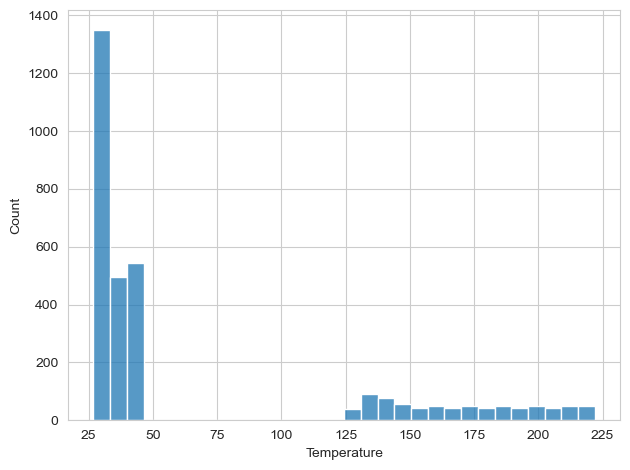

In [84]:
# checking for outliers in Temperature

sns.histplot(data = df, x = 'Temperature', bins = 30)
plt.tight_layout()
plt.show()

In [85]:
# temperature above 125 are not logical so they are considered as outliers

df[df['Temperature'] >50] 


,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
131,2013,Gulbarga,206.0,321.0,128.0,Red,Drip,67,53.0,Cocoa,53.0,Zaid
132,2014,Gulbarga,243.0,3654.0,129.0,Red,Drip,62,52.0,Cocoa,52.0,Zaid
133,2015,Gulbarga,123.0,323.0,130.0,Red,Drip,32,51.0,Cocoa,51.0,Zaid
134,2016,Gulbarga,82.0,324.0,131.0,Red,Drip,22,57.0,Cocoa,57.0,Zaid
135,2017,Gulbarga,74.0,3105.0,132.0,Red,Drip,25,57.0,Cocoa,57.0,Zaid
...,...,...,...,...,...,...,...,...,...,...,...,...
3140,2015,Davangere,10912.0,2746.2,218.0,Alluvial,Drip,4904,57.0,Cashew,57.0,Zaid
3141,2016,Davangere,51353.0,2746.2,219.0,Alluvial,Drip,2821,55.0,Cashew,55.0,Zaid
3142,2017,Davangere,142.0,2746.2,220.0,Alluvial,Drip,3472,56.0,Cashew,56.0,Zaid
3143,2018,Davangere,10505.0,3360.0,221.0,Alluvial,Drip,3647,54.0,Cashew,54.0,Zaid


In [86]:
# triming outliers 

df2 = df[df['Temperature'] < 50]

# new df with trimed outliers
df2.shape

(2393, 12)

In [87]:
categorical_columns = ['Location', 'Soil type', 'Irrigation', 'Crops', 'Season']
numerical_df = df.drop(categorical_columns, axis = 1)
numerical_df.head()

,Year,Area,Rainfall,Temperature,yields,Humidity,price
0,2004,1279.0,2903.1,27.0,2570,57.0,57.0
1,2004,13283.0,2903.1,27.0,27170,57.5,57.5
2,2004,52119.0,2903.1,27.0,114744,57.0,57.0
3,2004,725.0,2996.6,27.0,1402,55.0,55.0
4,2004,12885.0,2996.6,27.0,23456,56.0,56.0


## Exploratory Data Analysis (EDA)

Now that the data is clean, we can explore it to find patterns and insights.  
We want to understand:

- How crop production varies by crop type
- How area cultivated relates to production
- Seasonal trends in agriculture


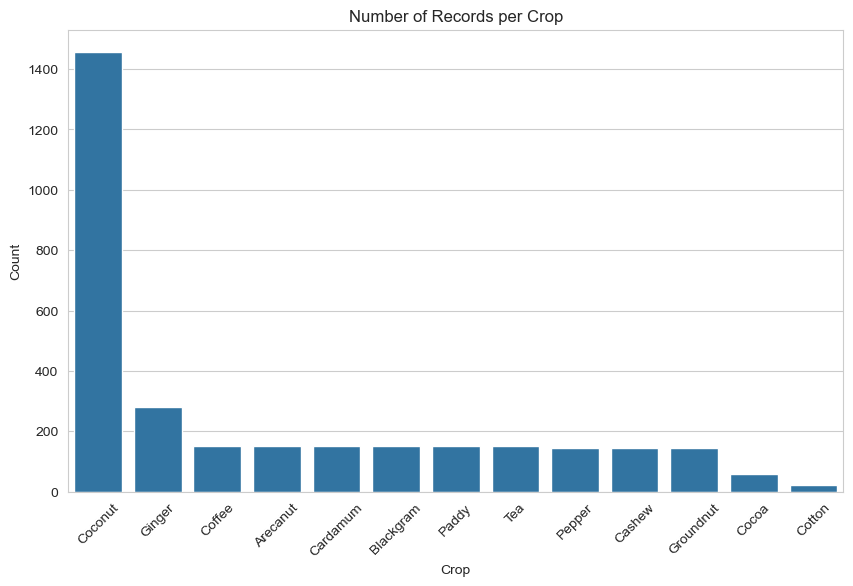

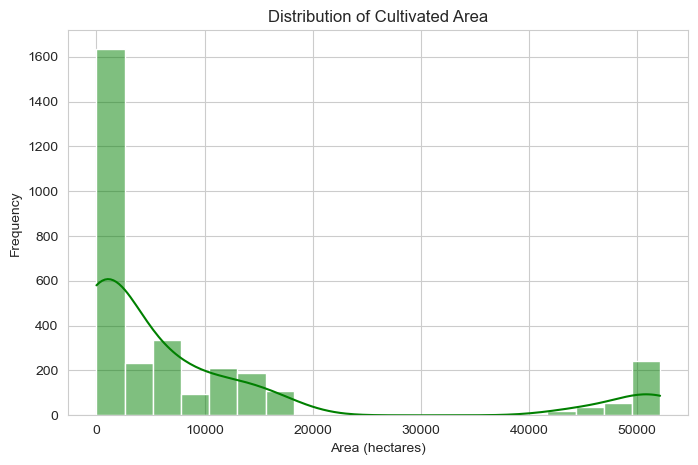

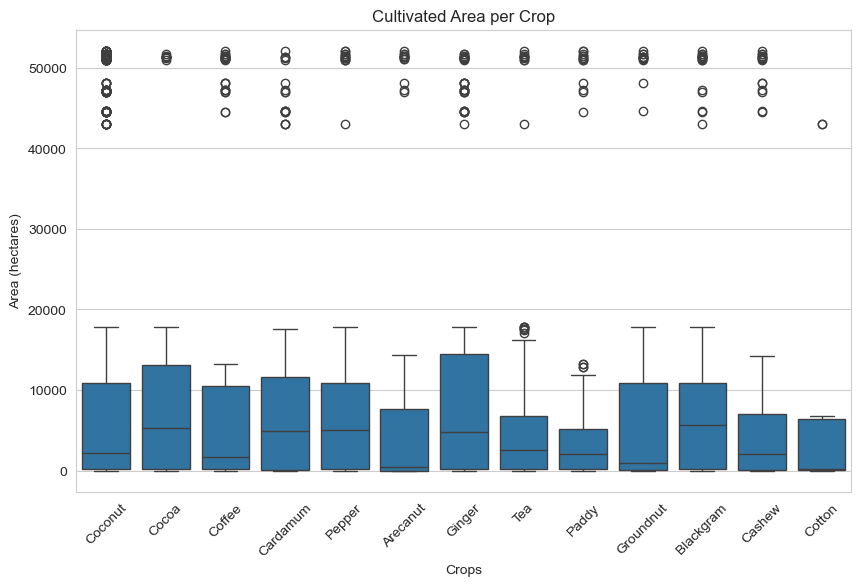

In [88]:
# Set plot style
sns.set_style('whitegrid')

# 1. Count of each crop
plt.figure(figsize=(10,6))
sns.barplot(x=crop_count.index, y=crop_count.values, hue=None, legend=False)  # safe for future versions
plt.title('Number of Records per Crop')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 2. Distribution of cultivated area
plt.figure(figsize=(8,5))
sns.histplot(df['Area'], bins=20, kde=True, color='green')
plt.title('Distribution of Cultivated Area')
plt.xlabel('Area (hectares)')
plt.ylabel('Frequency')
plt.show()

# 3. Area per crop using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Crops', y='Area')
plt.title('Cultivated Area per Crop')
plt.xlabel('Crops')
plt.ylabel('Area (hectares)')
plt.xticks(rotation=45)
plt.show()


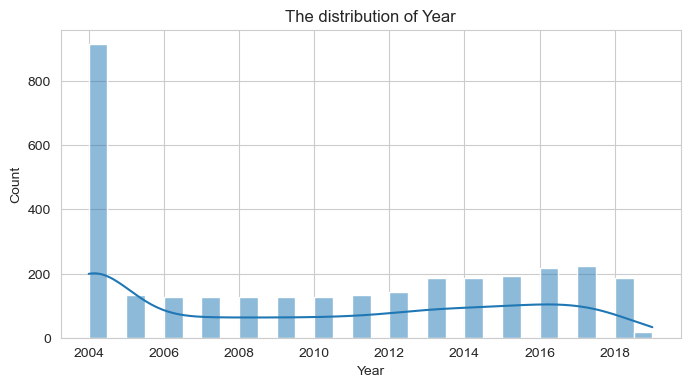

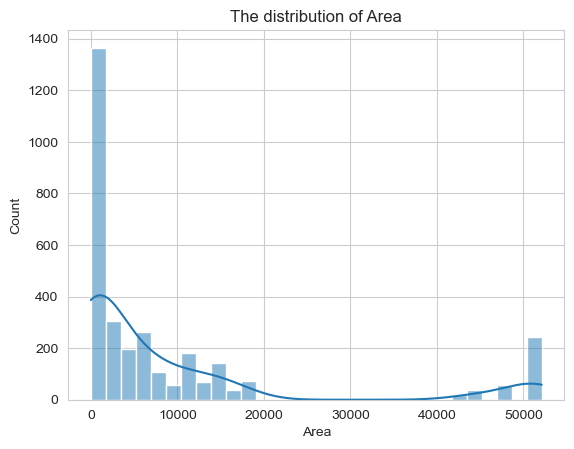

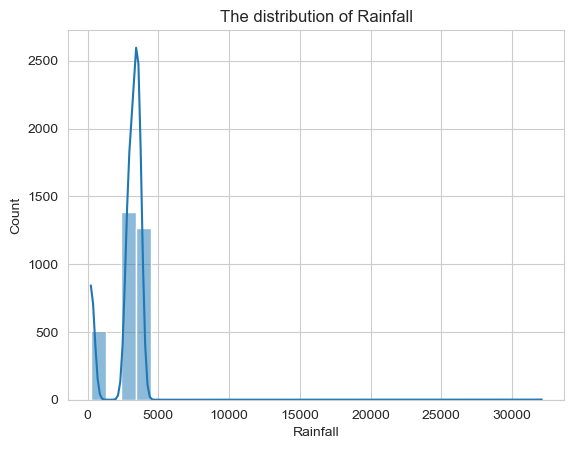

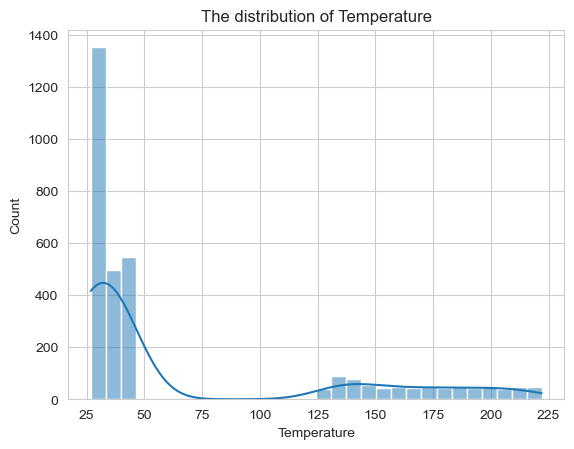

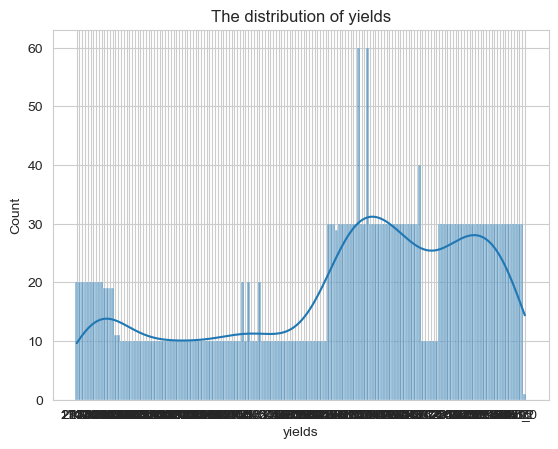

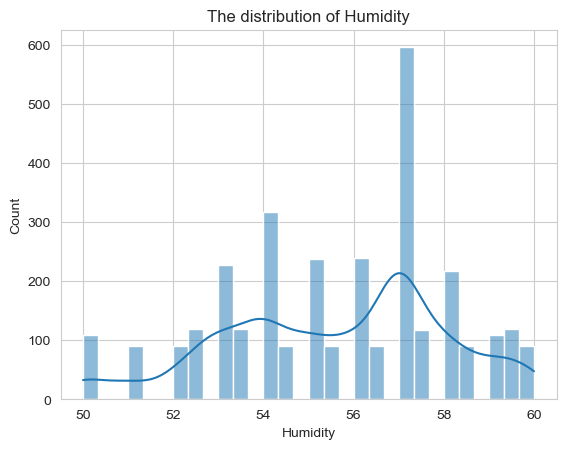

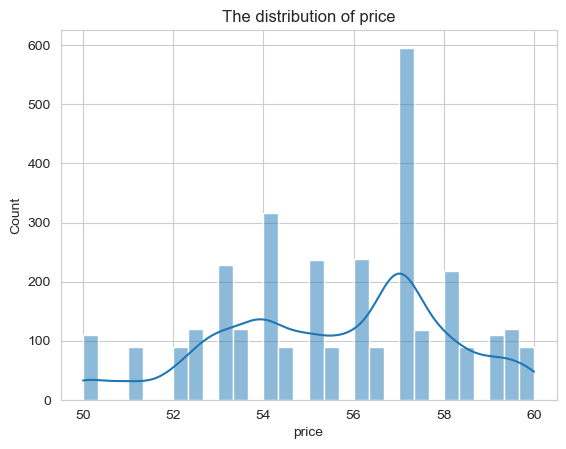

In [89]:
plt.figure(figsize = (8, 4))

for columns in numerical_df.columns:
    plt.title(f'The distribution of {columns}')
    sns.histplot(numerical_df[columns], kde = True, bins = 30)
    plt.show()

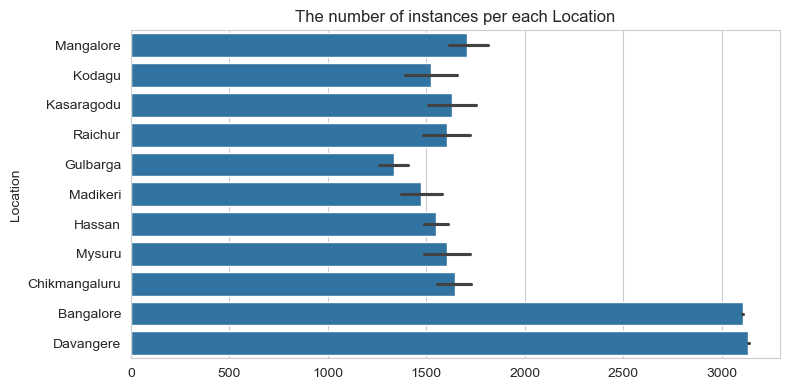

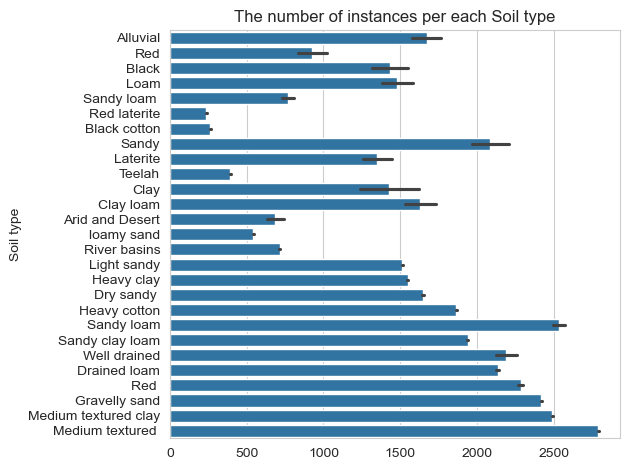

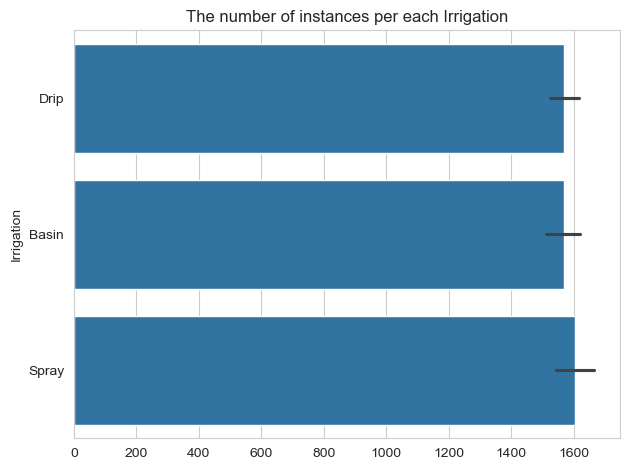

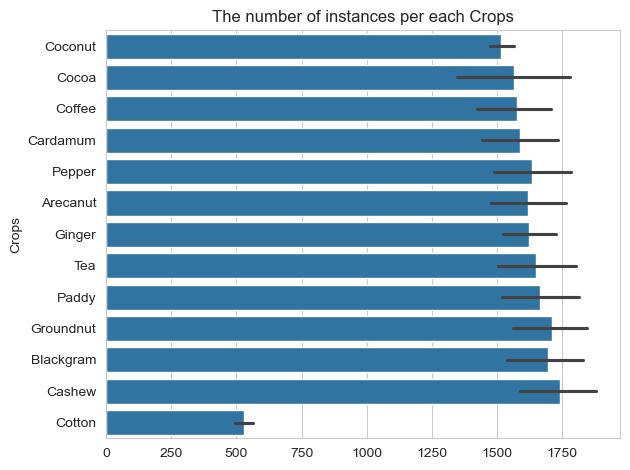

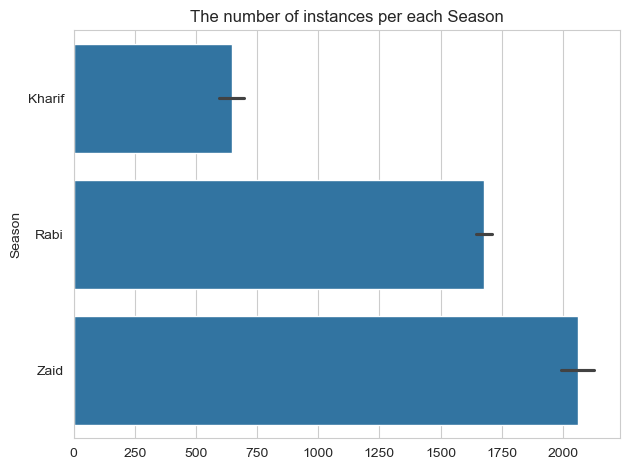

In [90]:
plt.figure(figsize = (8, 4))

for columns in df[categorical_columns]:
    plt.title(f'The number of instances per each {columns}')
    sns.barplot(df[columns])
    plt.tight_layout()
    plt.show()

In [91]:
# observing which locations have most and least crops overall

df.groupby('Location')['Crops'].count().sort_values(ascending = False)

Location
Hassan           798
Gulbarga         504
Mangalore        342
Chikmangaluru    340
Madikeri         240
Raichur          231
Kasaragodu       231
Mysuru           222
Kodagu           192
Davangere         42
Bangalore         16
Name: Crops, dtype: int64

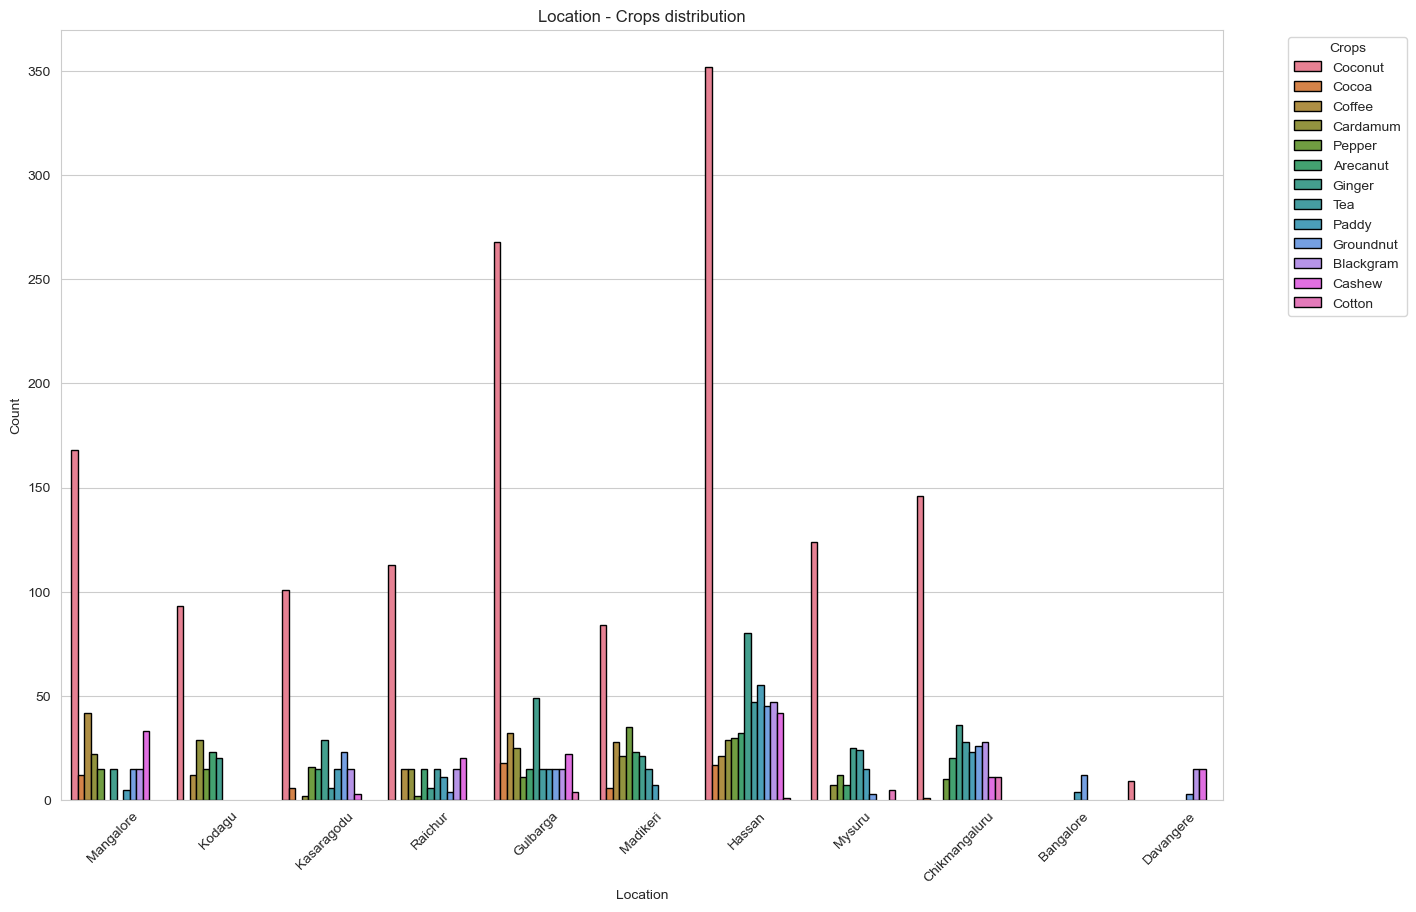

In [92]:
all_crops = ['Coconut', 'Cocoa', 'Coffee', 'Cardamum', 'Pepper', 'Arecanut', 
             'Ginger', 'Tea', 'Paddy', 'Groundnut', 'Blackgram', 'Cashew', 'Cotton']

plt.figure(figsize=(15, 10))
sns.countplot(data=df[df['Crops'].isin(all_crops)], 
              x='Location', hue='Crops', order=df['Location'].unique(), edgecolor = "black", linewidth = 1)

plt.title('Location - Crops distribution')
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside

plt.show()


In [93]:
print(df[['Rainfall', 'Humidity', 'yields']].dtypes)


Rainfall    float64
Humidity    float64
yields       object
dtype: object


In [94]:
df['yields'] = pd.to_numeric(df['yields'], errors='coerce')


In [95]:
# observing the impact of humidity and rainfall on the yield

df.groupby('Crops')[['Rainfall', 'Humidity', 'yields']].agg(['mean', 'median', 'std'])

Rainfall                        Humidity                   \
                  mean  median          std       mean median       std   
Crops                                                                     
Arecanut   3012.768667  3360.0   975.353306  55.400000   56.0  2.903365   
Blackgram  2819.302000  3296.0  1142.913285  55.806667   55.5  2.144907   
Cardamum   3175.846000  3360.0  2577.621183  55.400000   56.0  2.903365   
Cashew     2908.876027  3512.4  1187.817265  55.345890   56.0  2.440721   
Cocoa      2860.918333  3296.0  1128.081009  55.000000   55.0  3.241678   
Coconut    2723.198285  3105.0  1231.268573  55.651235   56.0  2.457156   
Coffee     2831.102000  3296.0  1145.698774  55.806667   56.0  1.982293   
Cotton     2621.028571  2996.6  1230.422057  55.952381   56.0  2.079091   
Ginger     2809.240214  3360.0  1226.722564  55.370107   55.5  2.196677   
Groundnut  2875.466438  3296.0  1125.961260  55.349315   56.0  2.909183   
Paddy      3139.082000  3360.0   797.979534  55.806667   56.0  1.982293   
Pepper     2789.817808  2996.6  1121.855291  55.811644   56.0  1.995979   
Tea        2850.937333  2996.6  1014.695037  55.400000   56.0  2.903365   

                 yields                         
                   mean  median            std  
Crops                                           
Arecanut    8842.206667  2716.5   23499.945094  
Blackgram  15880.406667   836.0   66092.775299  
Cardamum    7319.373333  2805.0   20576.998420  
Cashew      2598.493151  3356.5    1737.233204  
Cocoa       1429.583333  1356.0    1400.005972  
Coconut    34233.418737  3472.0   69470.865286  
Coffee     12636.540000  2331.0   30252.168787  
Cotton     51246.857143   804.0  135766.868612  
Ginger     26344.120996  2805.0   42633.450448  
Groundnut   9250.671233  3472.0   44256.325177  
Paddy      10061.326667   880.0   50431.559470  
Pepper     11301.267123  2331.0   28609.055030  
Tea        22776.753333  2331.0   64962.081273

In [96]:
# finding top ten crops based on the mean

top_ten_crop = df.groupby('Crops')['yields'].agg(['min', 'max', 'mean', 'count']).sort_values(by = 'mean', ascending = False).head(10)
top_ten_crop_list = top_ten_crop.index.tolist()
print (top_ten_crop_list)

['Cotton', 'Coconut', 'Ginger', 'Tea', 'Blackgram', 'Coffee', 'Pepper', 'Paddy', 'Groundnut', 'Arecanut']


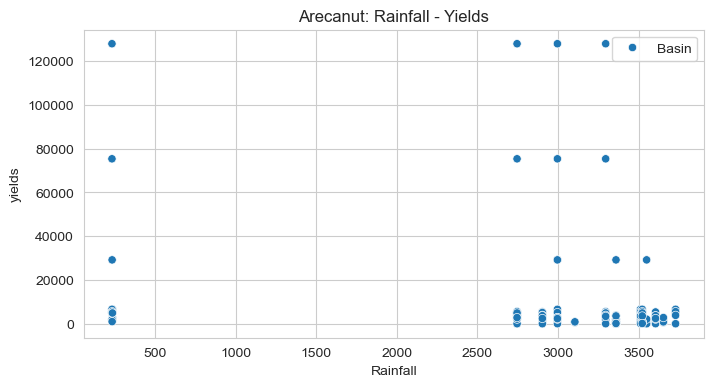

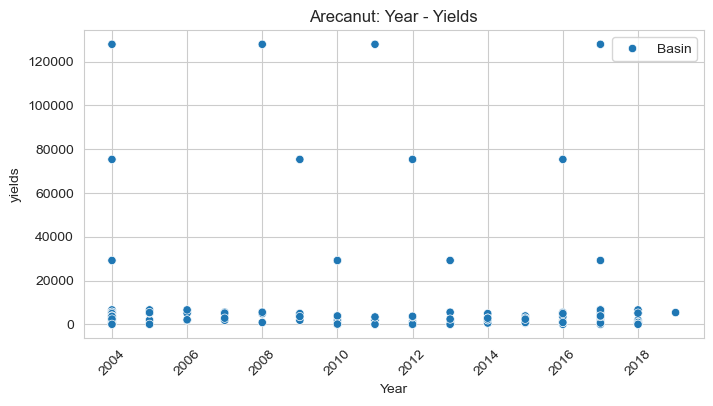

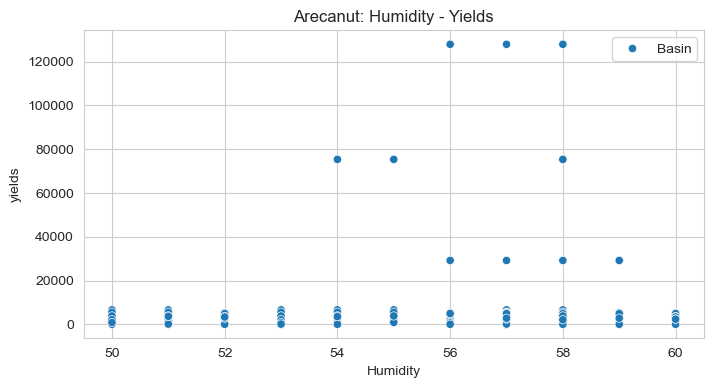

In [97]:
# For each crop in the top ten list, plot three scatterplots (Rainfall vs Yields, Year vs Yields, Humidity vs Yields)
# showing the relationship with rainfall, yields and irrigation for each of top ten crop

for crop in top_ten_crop_list:
    df_crop = df[df['Crops'] == crop]
    
# Rainfall vs Yields
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Rainfall', y='yields', hue='Irrigation', data=df_crop)
plt.title(f'{crop}: Rainfall - Yields')
plt.legend()
plt.show()
    
# Year vs Yields
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Year', y='yields', hue='Irrigation', data=df_crop)
plt.title(f'{crop}: Year - Yields')
plt.xticks(rotation=45)
plt.legend()
plt.show()
    
# Humidity vs Yields
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Humidity', y='yields', hue='Irrigation', data=df_crop)
plt.title(f'{crop}: Humidity - Yields')
plt.legend()
plt.show()


In [98]:
# finding top ten soil types

df['Soil type'].value_counts()
soil_percentage = df['Soil type'].value_counts() / len(df['Soil type'])
top_ten_soil_type = soil_percentage.sort_values(ascending = False).head(10)
top_ten_soil_type_list = top_ten_soil_type.index.tolist()
print (top_ten_soil_type_list)

['Alluvial', 'Laterite', 'Loam', 'Sandy loam', 'Black', 'Sandy loam ', 'Clay loam', 'Sandy', 'Red', 'Clay']


In [99]:
# observing Average Rainfall per Crop per Season using barplot

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Rainfall', hue='Crops', data=df[df['Crops'].isin(crops_1 + crops_2)], edgecolor="black",  linewidth=0.5)
plt.title('Average Rainfall per Crop per Season')

plt.grid(which='minor', axis='both', linestyle='-', linewidth=0.3, alpha=0.9)
plt.minorticks_on()

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

NameError: name 'crops_1' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# observing Total Percentage of Crops per Season

fig , ax = plt.subplots(1,2, figsize=(12, 6))

def plot_total_yield_season(df, ax, crops_list, title):
    total_season_yield = df.groupby('Season')['yields'].transform('sum')
    df['percentage'] = (df['yields'] / total_season_yield) * 100
    sns.barplot(x = 'Season' , y = 'percentage' , hue = 'Crops', data = df[df['Crops'].isin(crops_list)], ax = ax , dodge = False, errorbar= None)
    ax.set_ylabel('Percentage of Total Yield (%)')
    ax.set_title(title)
    ax.legend(loc = 'best')

plot_total_yield_season(df, ax[0], crops_1,'Total Percentage of Crops per Season')
plot_total_yield_season(df, ax[1], crops_2, 'Total Percentage of Crops per Season')

plt.tight_layout()
plt.show()

In [ ]:
# comparing 3 types of Irrigation using barplots of mean yield-Location

comp = sns.FacetGrid(df_irrigation_location, col='Irrigation', col_wrap=3, height=4)
comp.map(sns.barplot, 'Location', 'mean', order = sorted(df['Location']))
comp.set_xticklabels(rotation=90, ha='right')
comp.set_ylabels('Mean Yield')
comp.set_xlabels('Location')
comp.tight_layout()
plt.show()

In [ ]:
# observing the impact of different Location-Irrigations on yields

irrigation_location = df.groupby(['Irrigation', 'Location'])['yields'].agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = False)
df_irrigation_location = irrigation_location.reset_index()


plt.figure(figsize = (12, 6))

sns.barplot(data = df_irrigation_location, x = 'Location', y = 'mean', hue = 'Irrigation')
plt.title('Location-Irrigation of different regions')
plt.xlabel('Location')
plt.ylabel('Mean of yields')
plt.tight_layout()

In [ ]:
# observing the impact of different categorical columns on the price with boxplot

for col in categorical_columns:
    plt.figure(figsize = (10,6))
    sns.boxplot(data = df, x = col, y = 'price', order=df[col].unique())
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Price vs. {col}')
    plt.xticks(rotation=90, ha='right') # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

In [ ]:
# observing the impact of different bumerical columns on the price with scatter plot

numerical_df = df[['Year', 'Area', 'Rainfall', 'yields', 'Humidity']]

for col in numerical_df:
    plt.figure(figsize=(8 , 6)) 
    sns.scatterplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Price vs. {col}')
    plt.tight_layout()
    plt.show()

In [148]:
# price change in different years and seasons

season_year_price = df.groupby(['Crops', 'Year', 'Season'])['price'].agg(['min', 'max', 'count', 'mean']).sort_values(by = 'mean', ascending = False)
df_season_year_price = season_year_price.reset_index()
print(df_season_year_price)

         Crops  Year  Season   min   max  count  mean
0     Arecanut  2015    Zaid  60.0  60.0      1  60.0
1        Cocoa  2011    Rabi  60.0  60.0      1  60.0
2        Cocoa  2016  Kharif  60.0  60.0      1  60.0
3       Ginger  2012    Zaid  59.5  59.5      1  59.5
4    Groundnut  2007    Zaid  59.0  60.0      2  59.5
..         ...   ...     ...   ...   ...    ...   ...
529      Cocoa  2005    Zaid  51.0  51.0      1  51.0
530        Tea  2011    Rabi  50.0  51.0      2  50.5
531   Arecanut  2008    Zaid  50.0  50.0      1  50.0
532        Tea  2013    Zaid  50.0  50.0      1  50.0
533     Ginger  2009    Zaid  50.0  50.0      1  50.0

[534 rows x 7 columns]


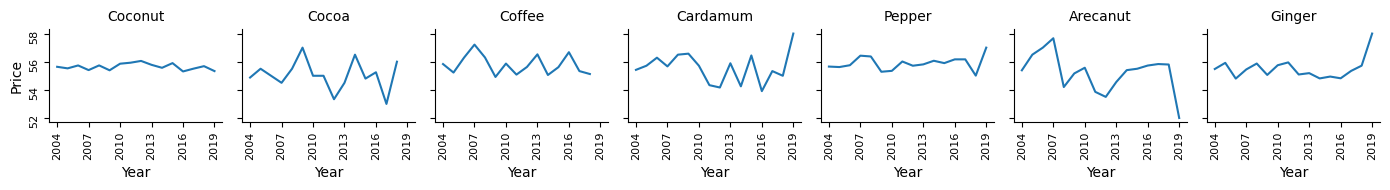

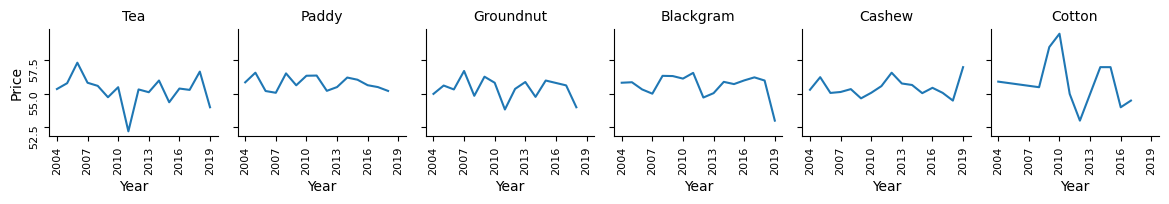

In [203]:
# observing price changes in years for each crop 
crops_1 = ['Coconut', 'Cocoa', 'Coffee', 'Cardamum', 'Pepper', 'Arecanut','Ginger']
crops_2 = ['Tea', 'Paddy', 'Groundnut', 'Blackgram', 'Cashew', 'Cotton']

c1 = sns.FacetGrid(df[df['Crops'].isin(crops_1)], col='Crops',col_wrap=7, height=2, sharey=True)
c1.map(sns.lineplot, 'Year', 'price', errorbar=None)
c1.set_titles('{col_name}')
c1.set_ylabels('Price')
c1.set_xlabels('Year')
for ax in c1.axes.flat:
    ax.set_xticks(np.arange(df['Year'].min(), df['Year'].max() + 1 , 3))
    ax.tick_params(rotation = 90, labelsize = 8)

c1.tight_layout()

c2 = sns.FacetGrid(df[df['Crops'].isin(crops_2)], col='Crops', col_wrap=6, height=2,sharey=True)
c2.map(sns.lineplot, 'Year', 'price', errorbar=None)
c2.set_titles('{col_name}')
c2.set_ylabels('Price')
c2.set_xlabels('Year')
for ax in c2.axes.flat:
    ax.set_xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 3))
    ax.tick_params(rotation = 90, labelsize = 8)

g2.tight_layout()

plt.show()

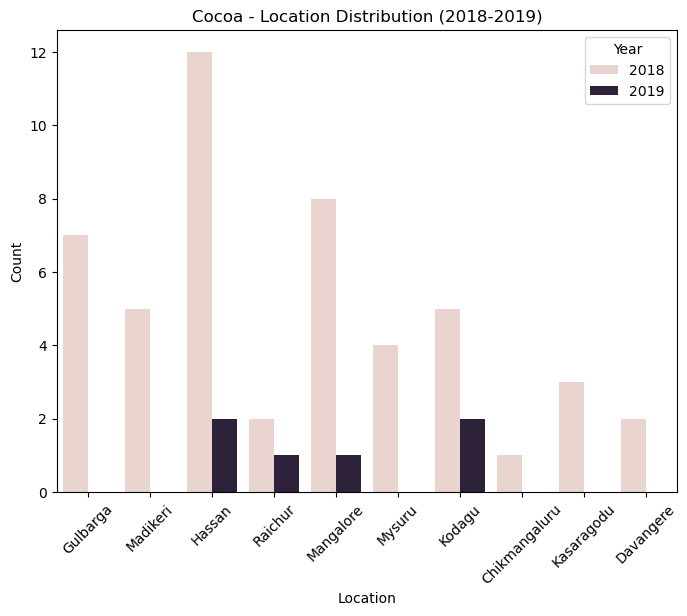

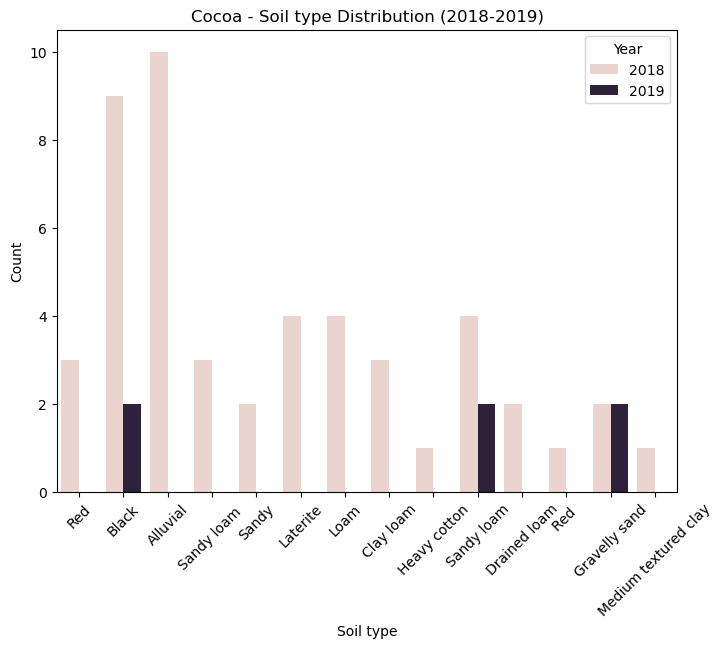

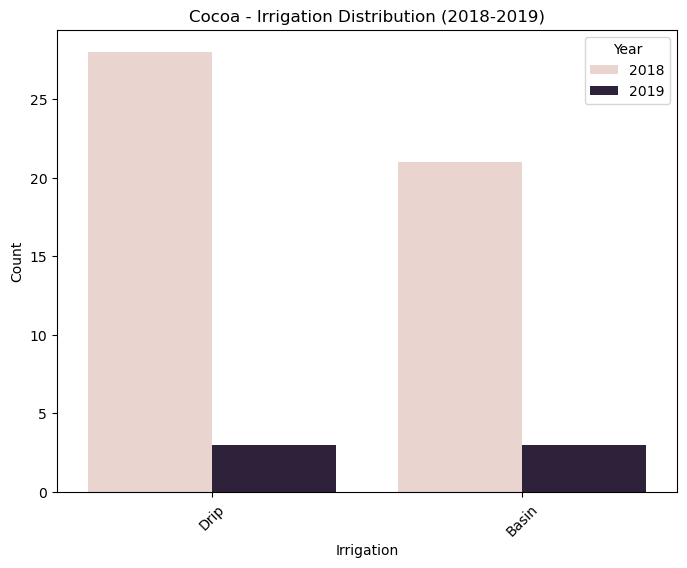

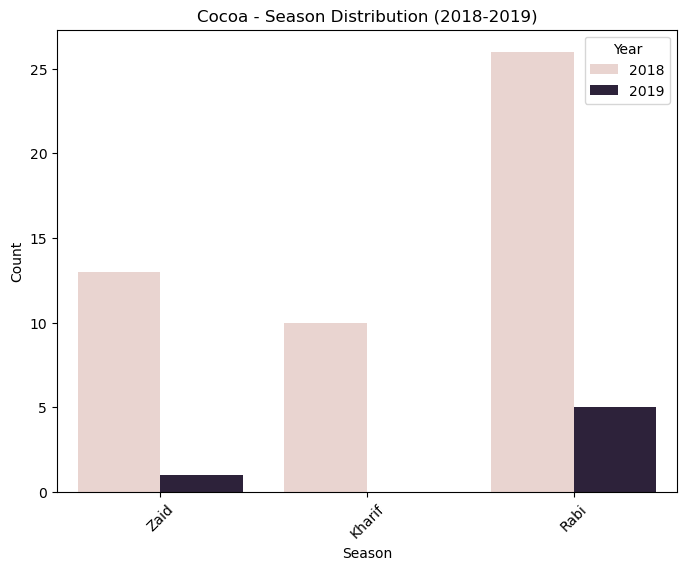

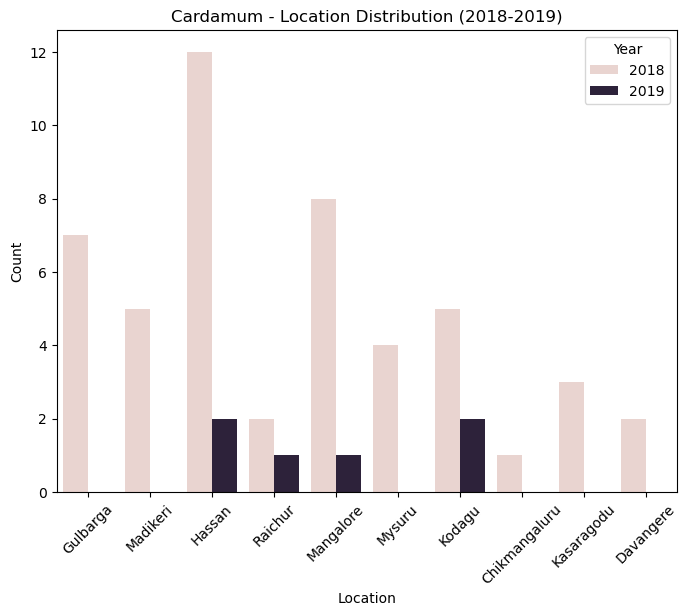

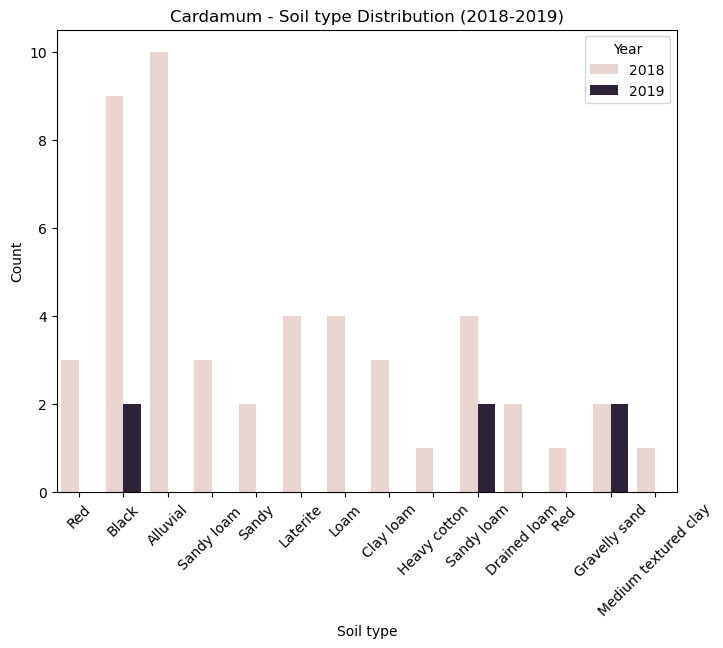

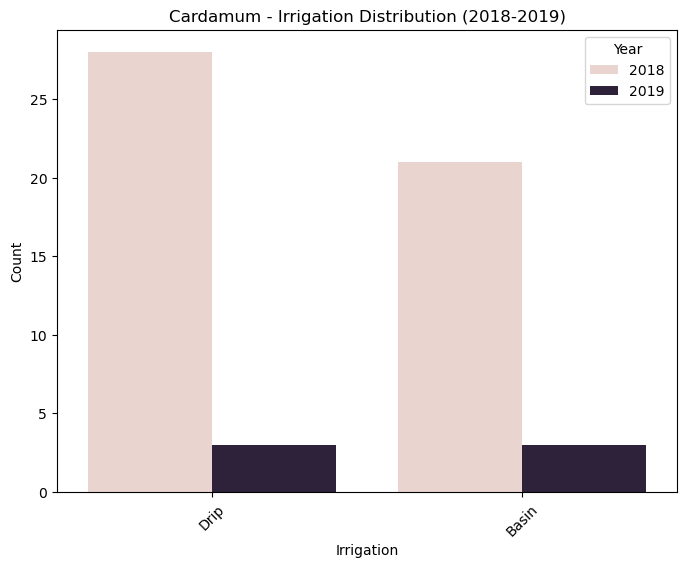

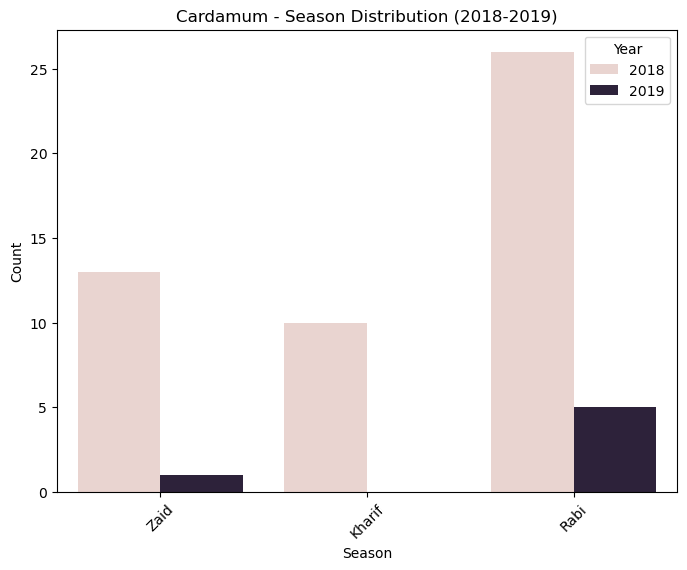

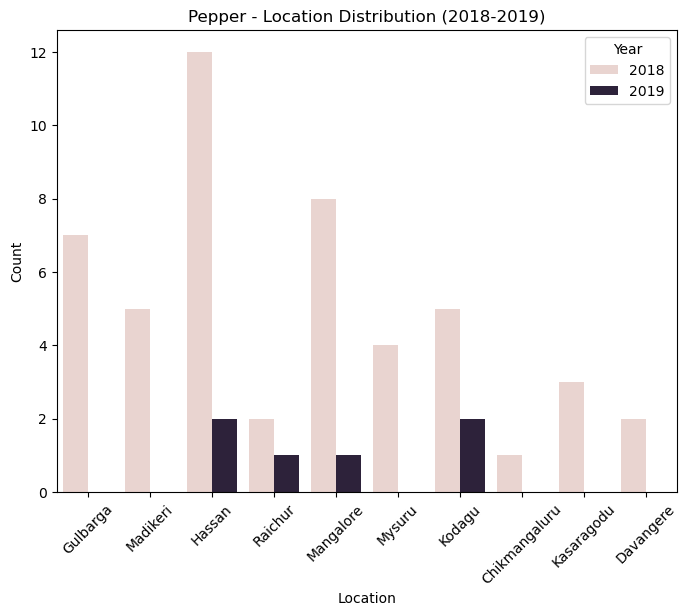

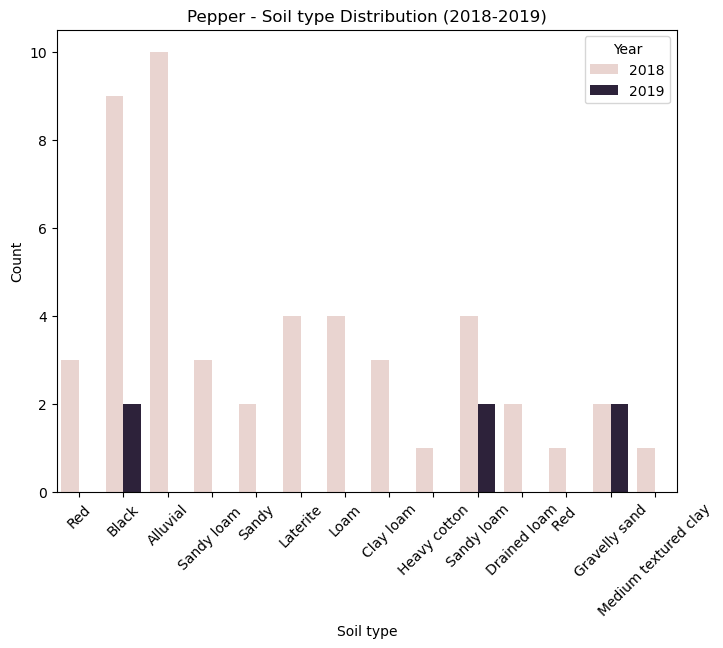

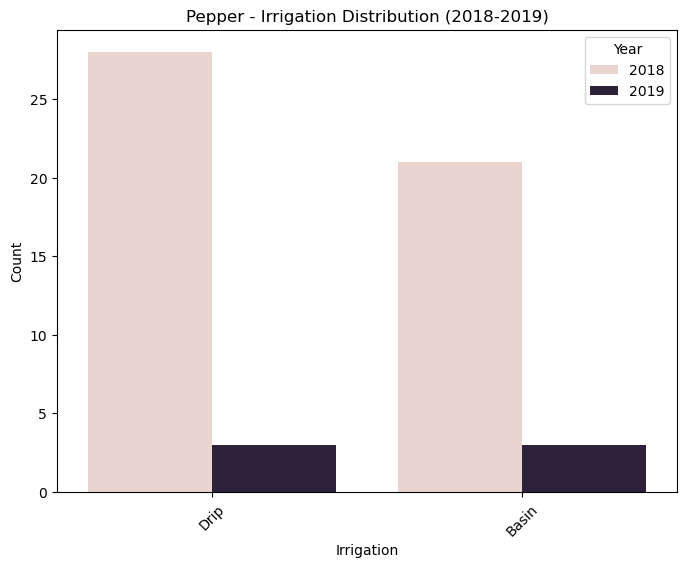

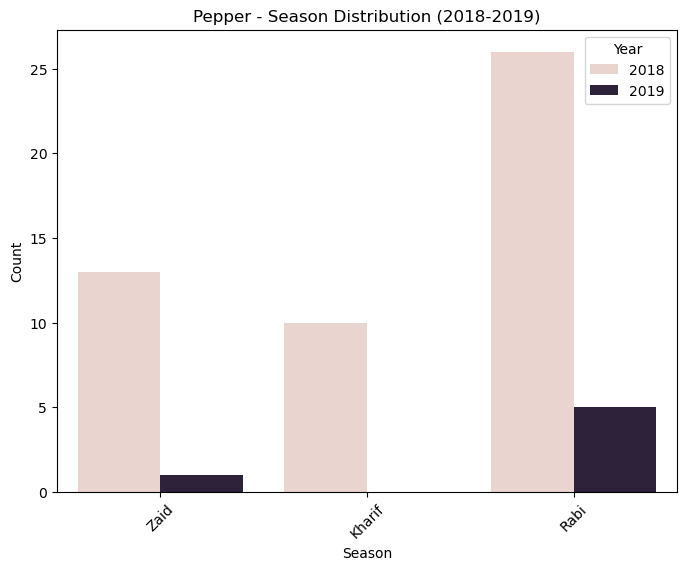

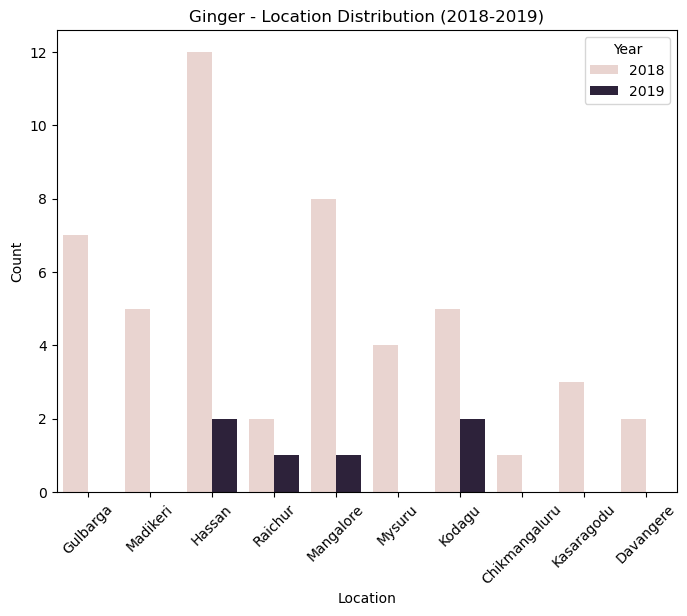

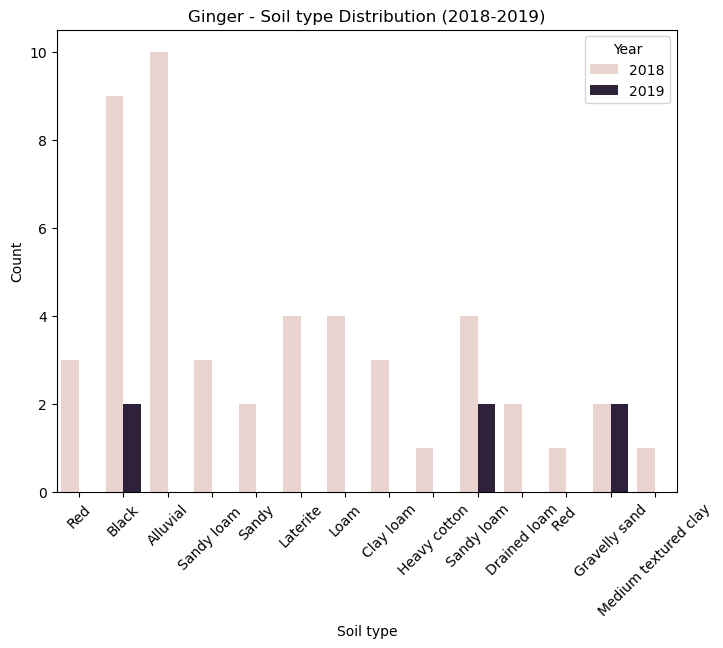

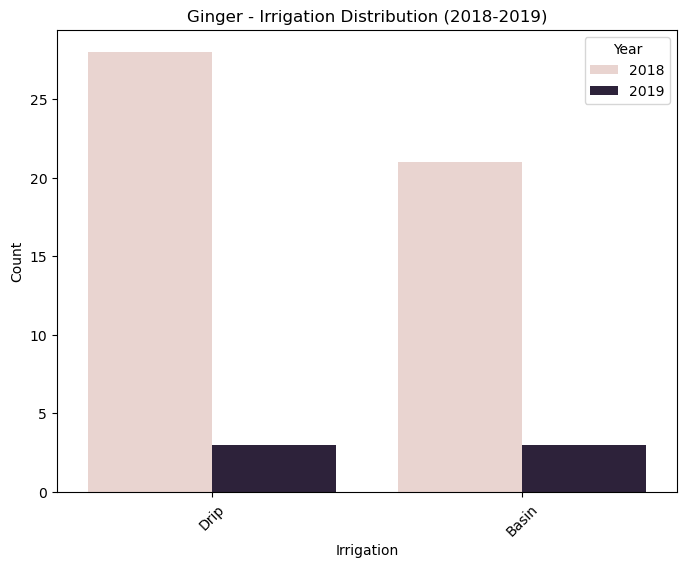

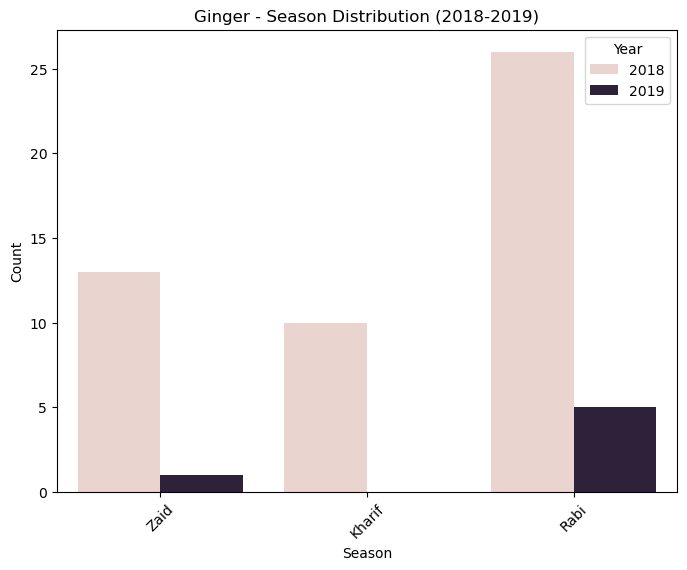

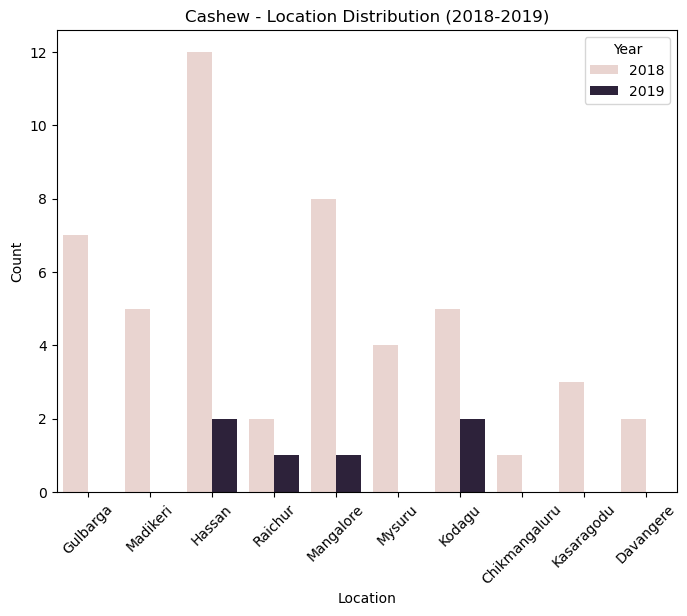

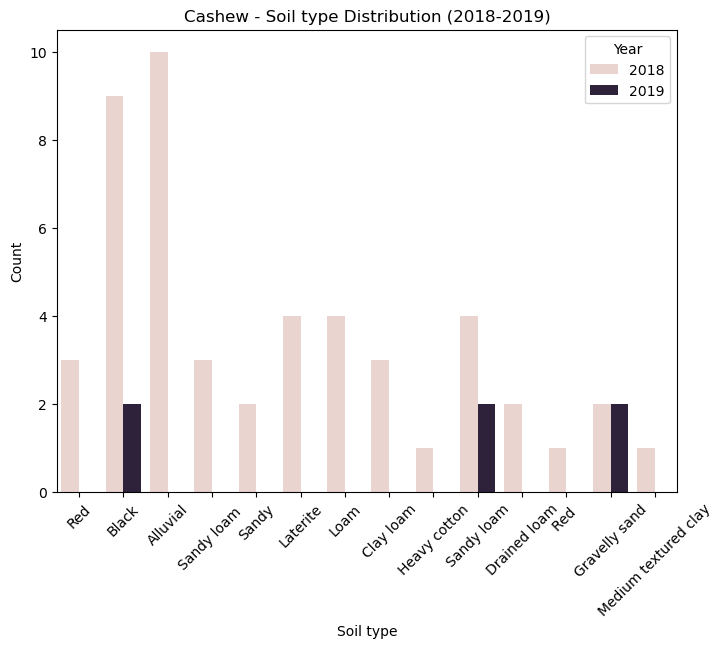

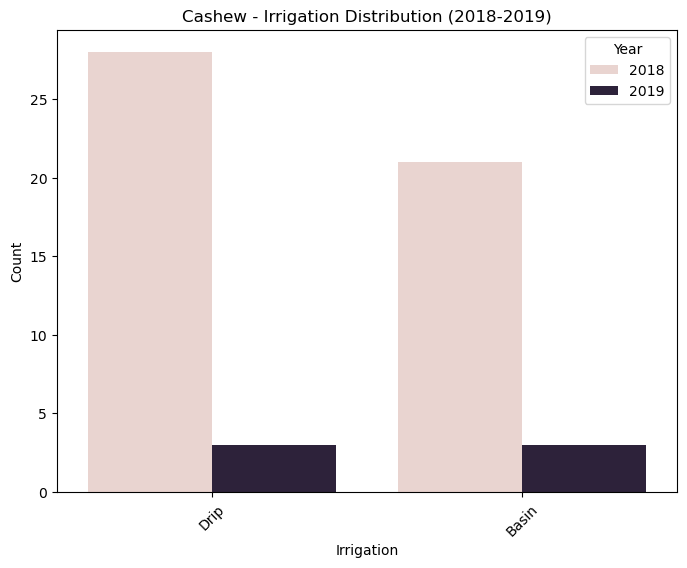

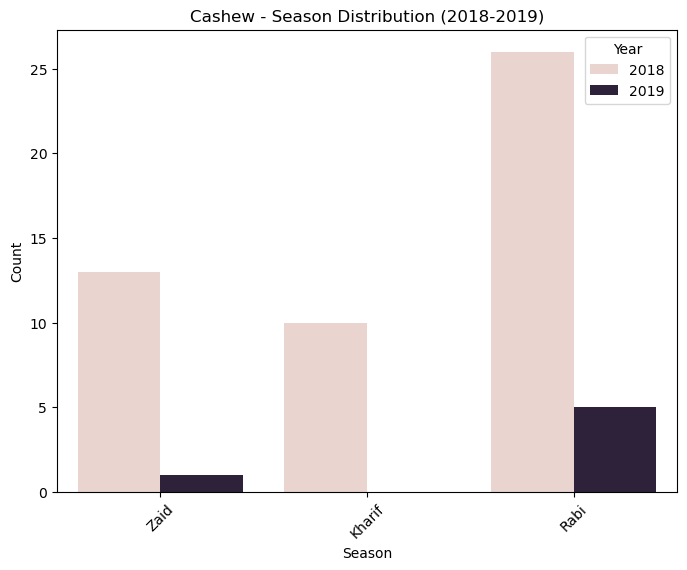

In [167]:
# it seems that the prices of Cocoa, Cardamum, Pepper, Ginger and Cashew are getting high in the last couple of years
# let's get deeper and observe and compare them in different categorical columns

crops_to_observe = ['Cocoa', 'Cardamum', 'Pepper', 'Ginger', 'Cashew']
years_to_observe = [2018, 2019]
df_to_observe = df[(df['Crops'].isin(crops_to_observe) & df['Year'].isin(years_to_observe))]


categorical_columns = ['Location', 'Soil type', 'Irrigation','Season']

for crop in crops_to_observe:
    df_to_observe[df_to_observe['Crops'] == crop]
    for column in categorical_columns:
        plt.figure(figsize = (8 , 6))
        sns.countplot(data = df_to_observe, x = column, hue = 'Year')
        plt.title(f'{crop} - {column} Distribution (2018-2019)')
        plt.xlabel(column)
        plt.xticks(rotation = 45)
        plt.ylabel('Count')
        plt.show()

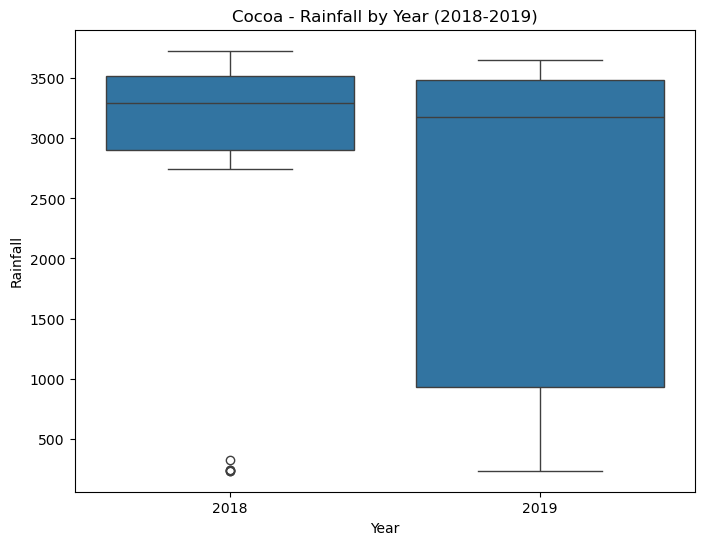

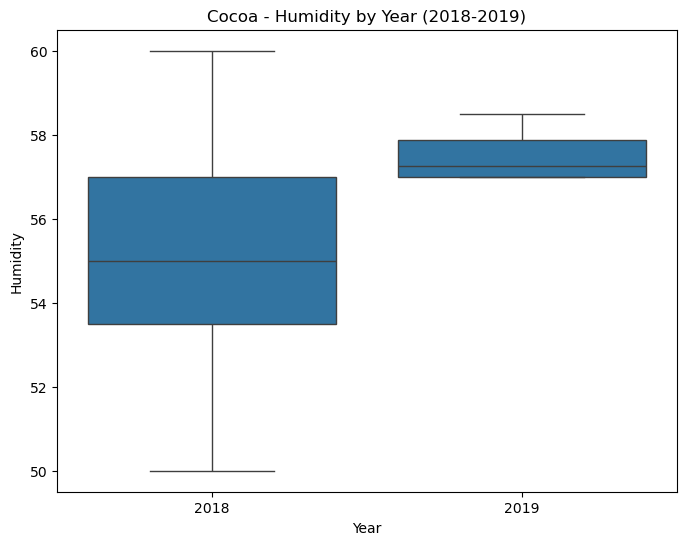

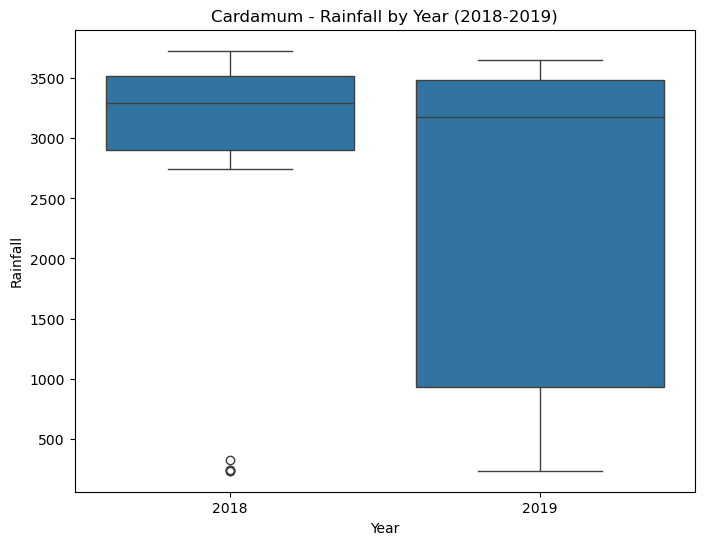

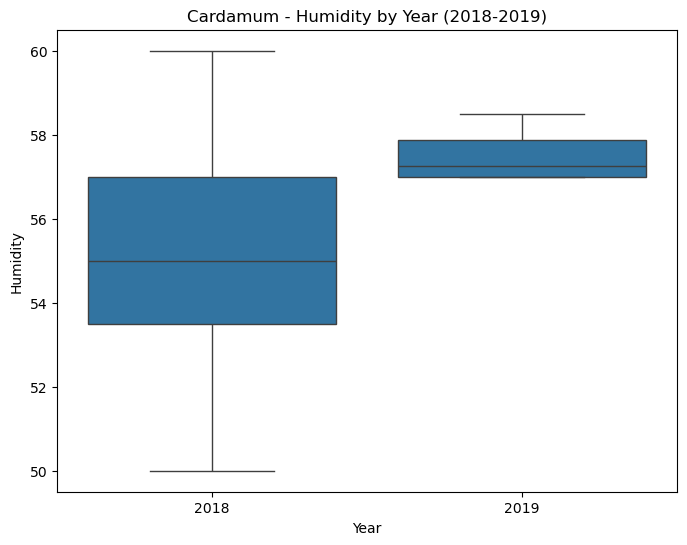

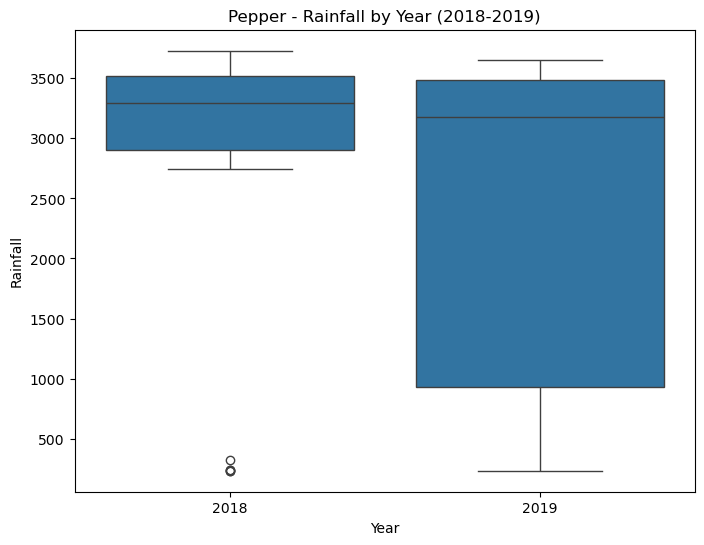

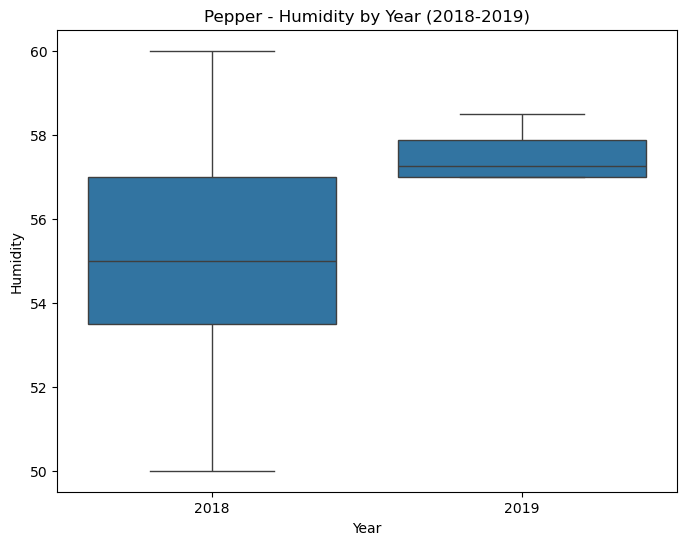

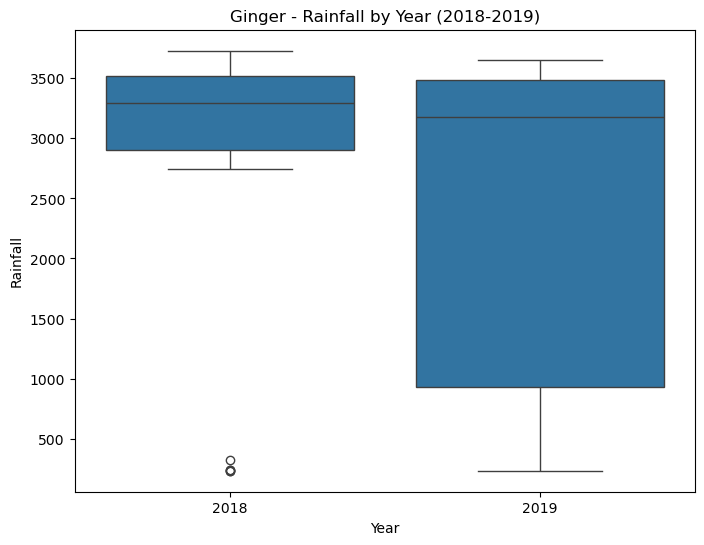

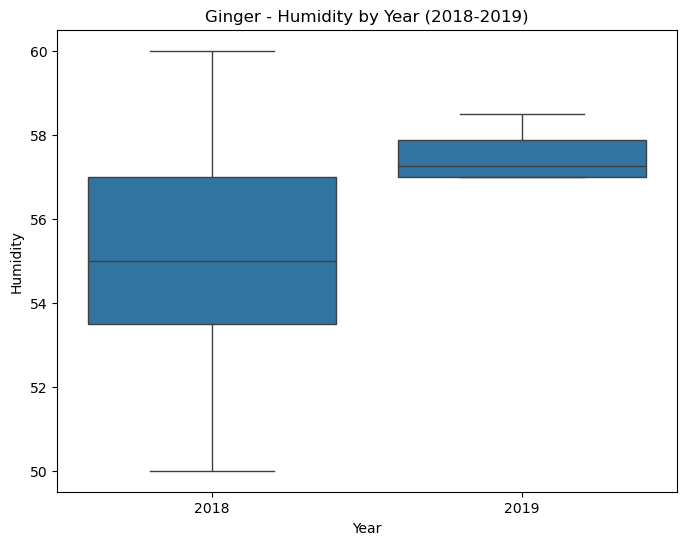

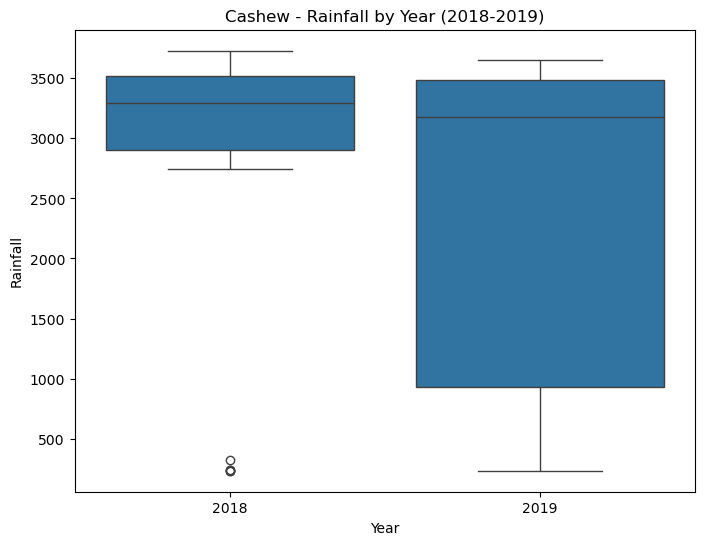

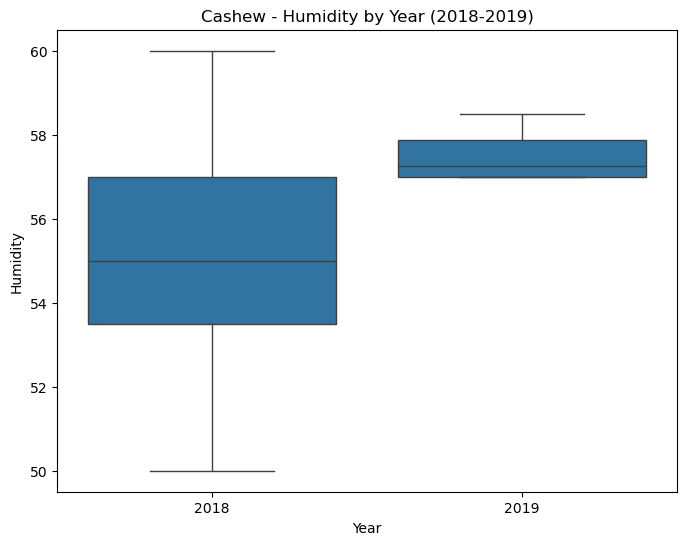

In [169]:
# observing rainfall and humidity of crops that are getting more expensive in 2018 and 2019

numerical_columns = ['Rainfall', 'Humidity']
for crop in crops_to_observe:
    df_to_observe[df_to_observe['Crops'] == crop]
    for column in numerical_columns:
        plt.figure(figsize = (8 , 6))
        sns.boxplot(data = df_to_observe, x = 'Year', y = column)
        plt.title(f'{crop} - {column} by Year (2018-2019)')
        plt.xlabel('Year')
        plt.ylabel(column.capitalize())
        plt.show()



## Conclusion

In this notebook, we:

- Loaded and explored agricultural data from Karnataka  
- Cleaned missing values and prepared the data for analysis  
- Created beginner-friendly visualizations to explore crop cultivation and area trends  
- Summarized key insights and takeaways  
